In [5]:
# Imports
import numpy as np
import pandas as pd

In [89]:
# Read in data
df = pd.read_csv("../data/churn_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# drop phone number (for now we are keeping area code but may drop it later)
df.pop('phone number')
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [8]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [9]:
# Per Sam, if I run this code again down below it will return an error, so need to rerun Kernal for all
# clean data
# convert binaries
churn_dict = {False: 0, True: 1}
yes_no_dict = {'no': 0, 'yes': 1}
df['churn'].replace(churn_dict, inplace=True)
df['international plan'].replace(yes_no_dict, inplace=True)
df['voice mail plan'].replace(yes_no_dict, inplace=True)

In [10]:
# Target/split off target
X = df.drop('churn', axis=1)
y = df.churn

In [11]:
# Target Balance
# checking value count (class imbalance)- there is a very large class inbalance. We will need to smote it
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [12]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
from sklearn.model_selection import train_test_split
# Train Test Split
# Don't touch test test data until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2021)

In [14]:
# function that Sam built to one hot encode
from sklearn.preprocessing import OneHotEncoder

# This code will onehotencode the categorical columns and return the dataframe
ohe_column_list = ['state']
def ohe2021(X, columns_list):  
    # One hot encode
    # get dataframe of categroical columns to oneHotEncode
    X_cat = X[ohe_column_list]
    X_cat.head()
    # get dataframe of numeric columns to oneHotEncode
    X_num = X.drop(ohe_column_list, axis=1)
    X_num.head()
    # Finally, One Hot Encode
    # from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse=False, drop='first')
    X_cat_oh = pd.DataFrame(ohe.fit_transform(X_cat), index= X_cat.index, columns=ohe.get_feature_names(X_cat.columns))
    X_cat_oh.head()
    # sandwich OHE df with numerical dataframes
    X = X_num.join(X_cat_oh)
    return X
X_train_oh = ohe2021(X_train, ohe_column_list)
X_train_oh.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
561,53,408,0,1,18,146.8,107,24.96,310.0,84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,77,415,0,0,0,245.2,87,41.68,254.1,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,130,510,0,0,0,124.3,70,21.13,270.7,99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3168,201,415,0,0,0,225.9,110,38.40,299.1,86,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562,99,408,0,1,28,200.7,88,34.12,264.2,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# # Scale * ONLY ON TRAINING DATA
from sklearn.preprocessing import StandardScaler

# scale data
def scale2021(X):
    ss = StandardScaler()
    X_scaled = pd.DataFrame(ss.fit_transform(X))
    X_scaled.index = X.index
    X_scaled.columns = X.columns
    return X_scaled
X_train_oh_sc = scale2021(X_train_oh)
X_train_oh_sc.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
561,-1.215926,-0.685167,-0.328029,1.620867,0.719950,-0.594966,0.326270,-0.594598,2.150149,-0.806009,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1764,-0.613634,-0.519135,-0.328029,-0.616954,-0.591007,1.193361,-0.660331,1.192879,1.045323,-0.856365,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1733,0.716426,1.734149,-0.328029,-0.616954,-0.591007,-1.003882,-1.498942,-1.004050,1.373411,-0.050659,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,7.464811,-0.151736,-0.185839,-0.153025
3168,2.498205,-0.519135,-0.328029,-0.616954,-0.591007,0.842602,0.474261,0.842226,1.934718,-0.705295,...,-0.131031,-0.126515,6.765496,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
562,-0.061534,-0.685167,-0.328029,1.620867,1.448259,0.384616,-0.611001,0.384666,1.244943,0.805404,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,6.534900


In [16]:
#Scale then Smote!
from imblearn.over_sampling import SMOTE

In [17]:
X_train_oh_sc_resamp, y_train_resamp = SMOTE().fit_resample(X_train_oh_sc, y_train)

In [18]:
# decided to drop area code as it only has 3 and serves no purpose
X_train_oh_sc.drop('area code', axis=1)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
561,-1.215926,-0.328029,1.620867,0.719950,-0.594966,0.326270,-0.594598,2.150149,-0.806009,2.150108,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1764,-0.613634,-0.328029,-0.616954,-0.591007,1.193361,-0.660331,1.192879,1.045323,-0.856365,1.045630,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
1733,0.716426,-0.328029,-0.616954,-0.591007,-1.003882,-1.498942,-1.004050,1.373411,-0.050659,1.373485,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,7.464811,-0.151736,-0.185839,-0.153025
3168,2.498205,-0.328029,-0.616954,-0.591007,0.842602,0.474261,0.842226,1.934718,-0.705295,1.933863,...,-0.131031,-0.126515,6.765496,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
562,-0.061534,-0.328029,1.620867,1.448259,0.384616,-0.611001,0.384666,1.244943,0.805404,1.245598,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,6.534900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,-0.262298,-0.328029,1.620867,1.375428,0.455494,-0.216360,0.455224,-1.288843,-0.352799,-1.288890,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
2669,1.092858,-0.328029,-0.616954,-0.591007,-0.911194,-0.167030,-0.911041,-0.312485,0.050054,-0.312298,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,5.380990,-0.153025
1152,-2.144459,-0.328029,-0.616954,-0.591007,0.544547,-0.561671,0.545026,-0.561516,-0.755652,-0.561096,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025
2105,-1.542167,-0.328029,-0.616954,-0.591007,1.144291,-0.906981,1.144772,0.626320,-0.151372,0.627090,...,-0.131031,-0.126515,-0.147809,-0.160559,-0.156833,-0.151736,-0.133962,-0.151736,-0.185839,-0.153025


In [19]:
y_train_resamp.value_counts()

1    2270
0    2270
Name: churn, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(random_state=2021)
log1.fit(X_train_oh_sc_resamp, y_train_resamp)
log1.score(X_train_oh_sc_resamp, y_train_resamp)

0.802863436123348

In [21]:
coef_log1 = {}
for coef, feat in zip(log1.coef_[0,:],X_train_oh_sc_resamp.columns):
    coef_log1[feat] = coef
log1_dict = coef_log1
log1_dict

{'account length': 0.08155524915303086,
 'area code': -0.13292954049554886,
 'international plan': 0.9295910511944978,
 'voice mail plan': -1.1561623911102576,
 'number vmail messages': 0.6811926547399826,
 'total day minutes': 0.42699479888793124,
 'total day calls': 0.12127212388197646,
 'total day charge': 0.42744459893830145,
 'total eve minutes': 0.25681444441325313,
 'total eve calls': 0.12944997634828326,
 'total eve charge': 0.20667701653450823,
 'total night minutes': 0.038311282222345706,
 'total night calls': -0.05253576986801247,
 'total night charge': 0.1017546454683902,
 'total intl minutes': 0.08284589973132611,
 'total intl calls': -0.23020525367426617,
 'total intl charge': 0.12041233758067824,
 'customer service calls': 0.9442787189107026,
 'state_AL': -0.1689695636469102,
 'state_AR': -0.10961539958126666,
 'state_AZ': -0.16438076545053512,
 'state_CA': 0.029206473894907273,
 'state_CO': -0.05980215613609821,
 'state_CT': -0.08709741346243295,
 'state_DC': -0.0377040

In [22]:
from sklearn.model_selection import cross_val_score

all_features_cross_val_score = cross_val_score(log1, X_train_oh_sc_resamp, y_train_resamp, cv=3)
all_features_cross_val_score

array([0.77476882, 0.79775281, 0.79841375])

In [23]:
log2 = LogisticRegression(class_weight='balanced', penalty='l1', C=0.5, solver="liblinear", )
log2.fit(X_train_oh_sc_resamp, y_train_resamp)
print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(log2, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.77476882 0.79775281 0.79841375]
New: [0.77344782 0.79709187 0.80039656]


In [24]:
coef_log2 = {}
for coef, feat in zip(log2.coef_[0,:],X_train_oh_sc_resamp.columns):
    coef_log2[feat] = coef
log2_dict = coef_log2
log2_dict

{'account length': 0.07924925543679125,
 'area code': -0.13116940436813207,
 'international plan': 0.9180577648888554,
 'voice mail plan': -1.0716725580364757,
 'number vmail messages': 0.6003634892172718,
 'total day minutes': 0.7786492657683615,
 'total day calls': 0.11122537778229133,
 'total day charge': 0.06406292215855845,
 'total eve minutes': 0.038728684695969594,
 'total eve calls': 0.12471621605004946,
 'total eve charge': 0.41267588396780897,
 'total night minutes': 0.10922847955034146,
 'total night calls': -0.0491627969934679,
 'total night charge': 0.023060467318138444,
 'total intl minutes': 0.19223614616918555,
 'total intl calls': -0.22684752913106399,
 'total intl charge': 0.004481110564916183,
 'customer service calls': 0.9366751104882741,
 'state_AL': -0.11441210625493994,
 'state_AR': -0.06457923705622008,
 'state_AZ': -0.11514831848558141,
 'state_CA': 0.060302189039462745,
 'state_CO': -0.013282438378174393,
 'state_CT': -0.03705061987513078,
 'state_DC': 0.00305

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
etc1 = ExtraTreesClassifier()
etc1.fit(X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(etc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))
# cross_val_score(dt_pipeline, X_train, y_train, scoring='recall')

Old: [0.77476882 0.79775281 0.79841375]
New: [0.94715984 0.96364838 0.97488434]


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knc1 = KNeighborsClassifier()
knc1.fit = (X_train_oh_sc_resamp, y_train_resamp)


print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(knc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.77476882 0.79775281 0.79841375]
New: [0.83091149 0.8301388  0.85525446]


In [27]:
from sklearn import svm

svm1 = svm.SVR()
svm1.fit(X_train_oh_sc_resamp, y_train_resamp)


print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(svm1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.77476882 0.79775281 0.79841375]
New: [-0.01998935  0.60235993  0.        ]


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()
rfc1.fit = (X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(rfc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.77476882 0.79775281 0.79841375]
New: [0.90885073 0.94315929 0.94712492]


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit = (X_train_oh_sc_resamp, y_train_resamp)

print("Old:", all_features_cross_val_score)
print("New:", cross_val_score(dtc1, X_train_oh_sc_resamp, y_train_resamp, cv=3))

Old: [0.77476882 0.79775281 0.79841375]
New: [0.87912814 0.91672174 0.91341705]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

sm = SMOTE()
ss = StandardScaler()
ohe = OneHotEncoder()
log = LogisticRegression()

In [31]:
# smote, our data inside of the pipeline and run cross val on that pipeline
# scale train, then go back and scale the test data that includes our training data
# basically we need a smoted and non smoted sample although both are scaled. Is it smote
# then scale or scale then smote?

# Fitting, DON'T FIT ON TEST SET
# train on up sample when smoting, don't oversample on both parts of the cross val

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
sm = SMOTE()
ss = StandardScaler()
ohe = OneHotEncoder()
log = LogisticRegression()

In [33]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                       (StandardScaler(), make_column_selector(dtype_include=np.number),
                                        SMOTE()))
#preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                                # StandardScaler(),
                                                # SMOTE(),
                                                # LogisticRegression())
preprocessing
preprocessing.fit_transform(X_train)

<2666x69 sparse matrix of type '<class 'numpy.float64'>'
	with 50654 stored elements in Compressed Sparse Row format>

In [34]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GridSearchCV

#pipe = some_pipeline(using sklearn, we need imblearn)

# param_grid = {
#     'randomforestclassifier__n_estimators': [100, 250, 500],
# }

# search = GridSearchCV(dt_pipeline, param_grid, n_jobs=-1)

preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                       (StandardScaler(), make_column_selector(dtype_include=np.number),
                                        SMOTE()))


#preprocessing = make_column_transformer((OneHotEncoder(), make_column_selector(dtype_include=object)),
                                                # StandardScaler(),
                                                # SMOTE(),
                                                # LogisticRegression())
preprocessing

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde485ecd10>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fde4938ab10>)])

In [35]:
preprocessing.fit_transform(X_train)

<2666x69 sparse matrix of type '<class 'numpy.float64'>'
	with 50654 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_pipeline = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=2021))
rf_pipeline = make_pipeline(preprocessing, RandomForestClassifier(random_state=2021))

In [37]:
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde485ecd10>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde4938ab10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2021))])

In [38]:
param_grid = {
    'randomforestclassifier__n_estimators': [100, 250, 500],
}

search = GridSearchCV(rf_pipeline, param_grid, n_jobs=-1)

search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fde485ecd10>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fde4938ab10>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [100, 250,
    

In [39]:
search.__dict__

{'scoring': None,
 'estimator': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('onehotencoder',
                                                   OneHotEncoder(),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde485ecd10>),
                                                  ('standardscaler',
                                                   StandardScaler(),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fde4938ab10>)])),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=2021))]),
 'n_jobs': -1,
 'iid': 'deprecated',
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'randomforestclassifier__n_estimators': [100, 250, 500]},
 'multimetric_': False,
 'best_index

In [40]:
search.best_params_

{'randomforestclassifier__n_estimators': 500}

In [41]:
search.best_score_

0.9343662822972224

In [42]:
search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde48e618d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde48e61e10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500, random_state=2021))])

In [43]:
cross_val_score(dt_pipeline, X_train, y_train, scoring='recall')

# New: [0.87318362 0.91275611 0.90680767]

array([0.675     , 0.6835443 , 0.65822785, 0.75949367, 0.73417722])

In [44]:
cross_val_score(rf_pipeline, X_train, y_train, scoring='recall')

# New: [0.90356671 0.93588896 0.93258427]

array([0.475     , 0.59493671, 0.51898734, 0.59493671, 0.67088608])

In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.pairplot(df[numeric_columns]);

In [51]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [50]:
newdf = X_train_oh_sc_resamp[['voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']]



In [59]:
heatmap_df = df.dropna()
heatmap_df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:
# fig, ax = plt.subplots()

# fig.suptitle("Dummy Model")

# plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [64]:
correlations = df.corr()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [69]:
heat = correlations[['international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']]

In [70]:
heat

,international plan,voice mail plan,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,0.024735,0.002918,-0.004628,0.006216,0.006214,-0.006757,-0.006745,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.048551,-0.000747,-0.001994,-0.008264,-0.008264,0.003580,0.003607,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,1.000000,0.006006,0.008745,0.049396,0.049398,0.019100,0.019106,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.006006,1.000000,0.956927,-0.001684,-0.001686,0.021545,0.021559,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,0.008745,0.956927,1.000000,0.000778,0.000776,0.017562,0.017578,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.049396,-0.001684,0.000778,1.000000,1.000000,0.007043,0.007029,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.003755,-0.011086,-0.009548,0.006750,0.006753,-0.021451,-0.021449,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.049398,-0.001686,0.000776,1.000000,1.000000,0.007050,0.007036,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.019100,0.021545,0.017562,0.007043,0.007050,1.000000,1.000000,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.006114,-0.006444,-0.005864,0.015769,0.015769,-0.011430,-0.011423,0.008703,0.017434,0.008674,0.002423,0.009233


In [83]:
! mkdir reports/images

mkdir: reports/images: File exists


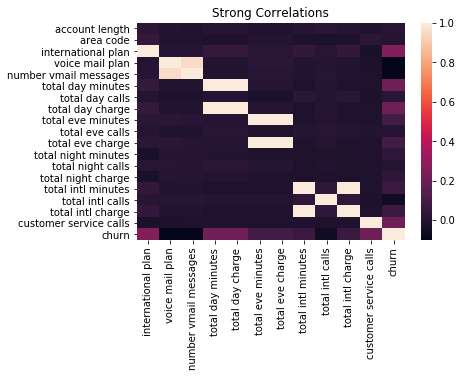

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ex = sns.heatmap(heat)
ax.set_title('Strong Correlations');
plt.savefig('corr_heat_map.png')

In [66]:
# Filter data
# create list of columns with correlations greater than a given percentage
min_percent = 0.05
corr = df.corr()
strong_corrs = []
for key, value in dict(corr.churn).items():
    if abs(value) > min_percent:
        strong_corrs.append(key)
print(strong_corrs)

['international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


['international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']